In [1]:
# Module 3
# BAM-3034: Sentiment Analysis & Text Mining

## Normalization

In [2]:
import numpy as np
# Example data
data = [50, 20, 30, 80, 100]
# Min-Max Normalization
def min_max_normalization(data):
    min_val = min(data)
    max_val = max(data)
    normalized = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized
normalized_data = min_max_normalization(data)
print("Min-Max Normalized Data:", normalized_data)

Min-Max Normalized Data: [0.375, 0.0, 0.125, 0.75, 1.0]


In [3]:
# Z-Score Normalization
def z_score_normalization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    normalized = [(x - mean) / std_dev for x in data]
    return normalized
z_score_normalized_data = z_score_normalization(data)
print("Z-Score Normalized Data:", z_score_normalized_data)


Z-Score Normalized Data: [np.float64(-0.1995570315713218), np.float64(-1.1973421894279308), np.float64(-0.8647471368090611), np.float64(0.7982281262852872), np.float64(1.4634182315230264)]


## Preprocessing

In [4]:


import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk, FreqDist

# Download necessary NLTK resources
# nltk.download("all")

# -------------------------------
# Input Text
# -------------------------------
text = """ Ottawa News: Canada’s central bank will make its first interest rate decision of 2026 on Wednesday and many economists expect no changes. 
In fact, barring any unforeseen circumstances, it may hold steady for the rest of the year.
The next scheduled date for announcing the overnight rate target is March 18, 2026.
 The Bank’s next MPR will be released on April 29, 2026."""

print("Original Text:\n", text)


Original Text:
  Ottawa News: Canada’s central bank will make its first interest rate decision of 2026 on Wednesday and many economists expect no changes. 
In fact, barring any unforeseen circumstances, it may hold steady for the rest of the year.
The next scheduled date for announcing the overnight rate target is March 18, 2026.
 The Bank’s next MPR will be released on April 29, 2026.


In [5]:
# -------------------------------
# 1. Tokenization
# -------------------------------
print("\n--- 1. Tokenization ---")
sentences = sent_tokenize(text)
terms = word_tokenize(text)

print("Sentence Tokenization:", sentences)
print("Word Tokenization:", terms)



--- 1. Tokenization ---
Sentence Tokenization: [' Ottawa News: Canada’s central bank will make its first interest rate decision of 2026 on Wednesday and many economists expect no changes.', 'In fact, barring any unforeseen circumstances, it may hold steady for the rest of the year.', 'The next scheduled date for announcing the overnight rate target is March 18, 2026.', 'The Bank’s next MPR will be released on April 29, 2026.']
Word Tokenization: ['Ottawa', 'News', ':', 'Canada', '’', 's', 'central', 'bank', 'will', 'make', 'its', 'first', 'interest', 'rate', 'decision', 'of', '2026', 'on', 'Wednesday', 'and', 'many', 'economists', 'expect', 'no', 'changes', '.', 'In', 'fact', ',', 'barring', 'any', 'unforeseen', 'circumstances', ',', 'it', 'may', 'hold', 'steady', 'for', 'the', 'rest', 'of', 'the', 'year', '.', 'The', 'next', 'scheduled', 'date', 'for', 'announcing', 'the', 'overnight', 'rate', 'target', 'is', 'March', '18', ',', '2026', '.', 'The', 'Bank', '’', 's', 'next', 'MPR', 'w

In [6]:
# -------------------------------
# 2. Stop Words Removal
# -------------------------------
print("\n--- 2. Stop Words Removal ---")
stop_words = set(stopwords.words("english"))
filtered_words = [x for x in terms if x.lower() not in stop_words and x.isalnum()]

print("Filtered Words:", filtered_words)


--- 2. Stop Words Removal ---
Filtered Words: ['Ottawa', 'News', 'Canada', 'central', 'bank', 'make', 'first', 'interest', 'rate', 'decision', '2026', 'Wednesday', 'many', 'economists', 'expect', 'changes', 'fact', 'barring', 'unforeseen', 'circumstances', 'may', 'hold', 'steady', 'rest', 'year', 'next', 'scheduled', 'date', 'announcing', 'overnight', 'rate', 'target', 'March', '18', '2026', 'Bank', 'next', 'MPR', 'released', 'April', '29', '2026']


In [7]:
# -------------------------------
# 3. Text Normalization
# -------------------------------
print("\n--- 3. Text Normalization ---")
# 3.1 Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in filtered_words]
print("Stemming:", stemmed_words)

# 3.2 Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w.lower()) for w in stemmed_words]
print("Lemmatization:", lemmatized_words)


--- 3. Text Normalization ---
Stemming: ['ottawa', 'new', 'canada', 'central', 'bank', 'make', 'first', 'interest', 'rate', 'decis', '2026', 'wednesday', 'mani', 'economist', 'expect', 'chang', 'fact', 'bar', 'unforeseen', 'circumst', 'may', 'hold', 'steadi', 'rest', 'year', 'next', 'schedul', 'date', 'announc', 'overnight', 'rate', 'target', 'march', '18', '2026', 'bank', 'next', 'mpr', 'releas', 'april', '29', '2026']
Lemmatization: ['ottawa', 'new', 'canada', 'central', 'bank', 'make', 'first', 'interest', 'rate', 'decis', '2026', 'wednesday', 'mani', 'economist', 'expect', 'chang', 'fact', 'bar', 'unforeseen', 'circumst', 'may', 'hold', 'steadi', 'rest', 'year', 'next', 'schedul', 'date', 'announc', 'overnight', 'rate', 'target', 'march', '18', '2026', 'bank', 'next', 'mpr', 'releas', 'april', '29', '2026']


## Part of speech tagging

In [8]:
# -------------------------------
# POS Tagging
# -------------------------------
print("\n--- Parts of Speech (POS) Tagging ---")
pos_tags = pos_tag(filtered_words)
print("POS Tags:", pos_tags)


--- Parts of Speech (POS) Tagging ---
POS Tags: [('Ottawa', 'NNP'), ('News', 'NNP'), ('Canada', 'NNP'), ('central', 'JJ'), ('bank', 'NN'), ('make', 'VBP'), ('first', 'JJ'), ('interest', 'NN'), ('rate', 'NN'), ('decision', 'NN'), ('2026', 'CD'), ('Wednesday', 'NNP'), ('many', 'JJ'), ('economists', 'NNS'), ('expect', 'VBP'), ('changes', 'NNS'), ('fact', 'NN'), ('barring', 'VBG'), ('unforeseen', 'JJ'), ('circumstances', 'NNS'), ('may', 'MD'), ('hold', 'VB'), ('steady', 'JJ'), ('rest', 'JJ'), ('year', 'NN'), ('next', 'RB'), ('scheduled', 'VBN'), ('date', 'NN'), ('announcing', 'VBG'), ('overnight', 'JJ'), ('rate', 'NN'), ('target', 'NN'), ('March', 'NNP'), ('18', 'CD'), ('2026', 'CD'), ('Bank', 'NNP'), ('next', 'JJ'), ('MPR', 'NNP'), ('released', 'VBD'), ('April', 'NNP'), ('29', 'CD'), ('2026', 'CD')]


## Named Entity Recognition (NER)


In [9]:
# -------------------------------
# Named Entity Recognition (NER)
# -------------------------------
print("\n--- Named Entity Recognition ---")
ner_tree = ne_chunk(pos_tags)
print("Named Entities:")
print(ner_tree)



--- Named Entity Recognition ---
Named Entities:
(S
  (PERSON Ottawa/NNP)
  (ORGANIZATION News/NNP Canada/NNP)
  central/JJ
  bank/NN
  make/VBP
  first/JJ
  interest/NN
  rate/NN
  decision/NN
  2026/CD
  Wednesday/NNP
  many/JJ
  economists/NNS
  expect/VBP
  changes/NNS
  fact/NN
  barring/VBG
  unforeseen/JJ
  circumstances/NNS
  may/MD
  hold/VB
  steady/JJ
  rest/JJ
  year/NN
  next/RB
  scheduled/VBN
  date/NN
  announcing/VBG
  overnight/JJ
  rate/NN
  target/NN
  March/NNP
  18/CD
  2026/CD
  (ORGANIZATION Bank/NNP)
  next/JJ
  (ORGANIZATION MPR/NNP)
  released/VBD
  April/NNP
  29/CD
  2026/CD)


## Frequency Distribution of Words


--- Frequency Distribution ---
Top 5 Most Common Words: [('2026', 3), ('rate', 2), ('next', 2), ('Ottawa', 1), ('News', 1)]


<Axes: title={'center': 'Word Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

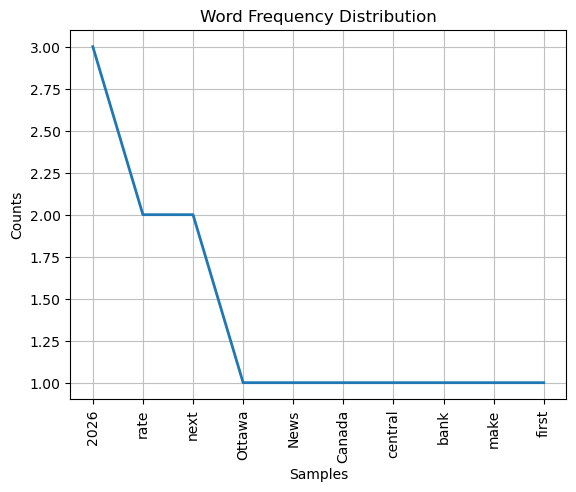

In [10]:
# -------------------------------
# Frequency Distribution
# -------------------------------
print("\n--- Frequency Distribution ---")
freq_dist = FreqDist(filtered_words)
print("Top 5 Most Common Words:", freq_dist.most_common(5))
freq_dist.plot(10, title="Word Frequency Distribution")

## Synonyms and Antonyms

In [11]:
# -------------------------------
# Synonyms and Antonyms
# -------------------------------
print("\n--- Synonyms and Antonyms ---")
word_choice = "barring"  # You can change this word
synonyms = []
antonyms = []

for syn in wordnet.synsets(word_choice):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print(f"Word: {word_choice}")
print("Synonyms:", set(synonyms))
print("Antonyms:", set(antonyms))


--- Synonyms and Antonyms ---
Word: barring
Synonyms: {'barring', 'banish', 'bar', 'blockade', 'stop', 'block', 'blackball', 'block_up', 'block_off', 'barricade', 'debar', 'exclude', 'relegate'}
Antonyms: {'unbar'}
